<a href="https://colab.research.google.com/github/StatsAI/streamlit_image_search/blob/main/Streamlit_Base_Image_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install DeepImageSearch --upgrade


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.5 MB/s eta 0:00:00
  Created wheel for DeepImageSearch: filename=DeepImageSearch-2.5-py3-none-any.whl size=8457 sha256=2ed6ae1491bf179a42f24767a4aa1387721f71a303f5030e84834f2e00b2d619
  Stored in directory: /root/.cache/pip/wheels/50/e6/4e/3c57c420e1fa20cba29a168f084e77129b0299c7fd6cdd08b5
Successfully built DeepImageSearch


In [ ]:
#!pip uninstall faiss_cpu

In [ ]:
#!pip install faiss_gpu

In [ ]:
#pip show faiss_gpu

In [ ]:
#pip show DeepImageSearch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from DeepImageSearch import Load_Data,Search_Setup


In [4]:
# Load images from a folder
image_list = Load_Data().from_folder(['drive/MyDrive/archive'])

In [5]:
print("Total Image Count:",len(image_list))
print("Samples:")
print(image_list[:10])

Total Image Count: 5400
Samples:
['drive/MyDrive/archive/animals/animals/boar/0b2e935388.jpg', 'drive/MyDrive/archive/animals/animals/boar/2c23b537e2.jpg', 'drive/MyDrive/archive/animals/animals/boar/5aa8637cf7.jpg', 'drive/MyDrive/archive/animals/animals/boar/13e49ce33a.jpg', 'drive/MyDrive/archive/animals/animals/boar/962a7fc413.jpg', 'drive/MyDrive/archive/animals/animals/boar/1643dbb824.jpg', 'drive/MyDrive/archive/animals/animals/boar/0903d0db72.jpg', 'drive/MyDrive/archive/animals/animals/boar/9d842e6c27.jpg', 'drive/MyDrive/archive/animals/animals/boar/2bec6d90a6.jpg', 'drive/MyDrive/archive/animals/animals/boar/549c6255cb.jpg']


In [6]:
st

NameError: ignored

In [7]:
# Set up the search engine
st = Search_Setup(image_list=image_list,model_name='vgg19',pretrained=True,image_count= None)

 Please Wait Model Is Loading or Downloading From Server!


 Model Loaded Successfully: vgg19


In [ ]:
# Index the images
st.run_index()

100%|██████████| 5400/5400 [2:11:41<00:00,  1.46s/it]


 Image Meta Information Saved: [metadata-files/vgg19/image_data_features.pkl]
 Saved The Indexed File:[metadata-files/vgg19/image_features_vectors.idx]


In [8]:
# Get metadata
metadata = st.get_image_metadata_file()
metadata

FileNotFoundError: ignored

In [ ]:
# Add new images to the index
st.add_images_to_index(image_list[101:110])

100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


 New images added to the index: 9


In [ ]:
# Update metadata
metadata = st.get_image_metadata_file()
metadata

images_paths  \
0     drive/MyDrive/archive/animals/animals/boar/0b2...   
1     drive/MyDrive/archive/animals/animals/boar/2c2...   
2     drive/MyDrive/archive/animals/animals/boar/5aa...   
3     drive/MyDrive/archive/animals/animals/boar/13e...   
4     drive/MyDrive/archive/animals/animals/boar/962...   
...                                                 ...   
5404  drive/MyDrive/archive/animals/animals/badger/6...   
5405  drive/MyDrive/archive/animals/animals/badger/3...   
5406  drive/MyDrive/archive/animals/animals/badger/0...   
5407  drive/MyDrive/archive/animals/animals/badger/6...   
5408  drive/MyDrive/archive/animals/animals/badger/0...   

                                               features  
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0099283345, 0.0, 0...  
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00314530...  
2     [0.0, 0.040509492, 0.0, 0.010894803, 0.0, 0.0,...  
3     [0.0, 0.0, 0.0, 0.0, 0.0019614708, 0.0, 0.0197...  
4     [0.0, 0.0, 0.0, 0.0060745534, 0.0, 0.0, 0.0, 0...  
...                                                 ...  
5404  [0.0, 0.0, 0.01243054, 0.008391166, 0.0, 0.017...  
5405  [0.0, 0.0, 0.0, 0.0, 0.0, 0.025998844, 0.05860...  
5406  [0.0, 0.0, 0.019972647, 0.0, 0.0, 0.056201417,...  
5407  [0.0, 0.0, 0.06782458, 0.02608231, 0.0, 0.0, 0...  
5408  [0.0, 0.0, 0.0, 0.0, 0.0, 0.031630743, 0.0, 0....  

[5409 rows x 2 columns]

In [ ]:
# Get similar images
st.get_similar_images(image_path=image_list[11],number_of_images=10)

{11: 'drive/MyDrive/archive/animals/animals/boar/481db3c9bd.jpg',
 59: 'drive/MyDrive/archive/animals/animals/boar/25ec8c79ee.jpg',
 55: 'drive/MyDrive/archive/animals/animals/boar/351fc18170.jpg',
 4: 'drive/MyDrive/archive/animals/animals/boar/962a7fc413.jpg',
 47: 'drive/MyDrive/archive/animals/animals/boar/517c9f6d24.jpg',
 57: 'drive/MyDrive/archive/animals/animals/boar/7b435a22dd.jpg',
 17: 'drive/MyDrive/archive/animals/animals/boar/1e28d918cf.jpg',
 13: 'drive/MyDrive/archive/animals/animals/boar/149cf25549.jpg',
 38: 'drive/MyDrive/archive/animals/animals/boar/2005eb9945.jpg',
 19: 'drive/MyDrive/archive/animals/animals/boar/583c3a1d3e.jpg'}

In [21]:
import DeepImageSearch.config as config
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import numpy as np
from torchvision import transforms
import torch
from torch.autograd import Variable
import timm
from PIL import ImageOps
import math
import faiss

loaded_index = faiss.read_index("drive/MyDrive/Streamlit/image_features_vectors.idx")
loaded_index

<faiss.swigfaiss_avx2.IndexFlat; proxy of <Swig Object of type 'faiss::IndexFlat *' at 0x794124e73de0> >

In [22]:
image_data = pd.read_pickle("drive/MyDrive/Streamlit/image_data_features.pkl")

In [23]:
st.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [24]:
def _extract(img):
        # Resize and convert the image
        img = img.resize((224, 224))
        img = img.convert('RGB')

        # Preprocess the image
        preprocess = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229,0.224, 0.225]),
        ])
        x = preprocess(img)
        x = Variable(torch.unsqueeze(x, dim=0).float(), requires_grad=False)

        # Extract features
        feature = st.model(x)
        feature = feature.data.numpy().flatten()
        return feature / np.linalg.norm(feature)

In [25]:
def _get_query_vector(image_path: str):
        img = Image.open(image_path)
        query_vector = _extract(img)
        return query_vector


In [26]:
def _search_by_vector(v, n: int):
        #self.v = v
        #self.n = n

        #index = faiss.read_index(config.image_features_vectors_idx(self.model_name))

        D, I = loaded_index.search(np.array([v], dtype=np.float32), n)
        return dict(zip(I[0], image_data.iloc[I[0]]['images_paths'].to_list()))

In [27]:
def plot_similar_images_new(image_path: str, number_of_images: int = 6):
        """
        Plots a given image and its most similar images according to the indexed image features.

        Parameters:
        -----------
        image_path : str
            The path to the query image to be plotted.
        number_of_images : int, optional (default=6)
            The number of most similar images to the query image to be plotted.
        """
        input_img = Image.open(image_path)
        input_img_resized = ImageOps.fit(input_img, (224, 224), Image.LANCZOS)
        plt.figure(figsize=(5, 5))
        plt.axis('off')
        plt.title('Input Image', fontsize=18)
        plt.imshow(input_img_resized)
        plt.show()

        query_vector = _get_query_vector(image_path)
        img_list = list(_search_by_vector(query_vector, number_of_images).values())

        grid_size = math.ceil(math.sqrt(number_of_images))
        axes = []
        fig = plt.figure(figsize=(20, 15))
        for a in range(number_of_images):
            axes.append(fig.add_subplot(grid_size, grid_size, a + 1))
            plt.axis('off')
            img = Image.open(img_list[a])
            img_resized = ImageOps.fit(img, (224, 224), Image.LANCZOS)
            plt.imshow(img_resized)
        fig.tight_layout()
        fig.subplots_adjust(top=0.93)
        fig.suptitle('Similar Result Found', fontsize=22)
        plt.show(fig)

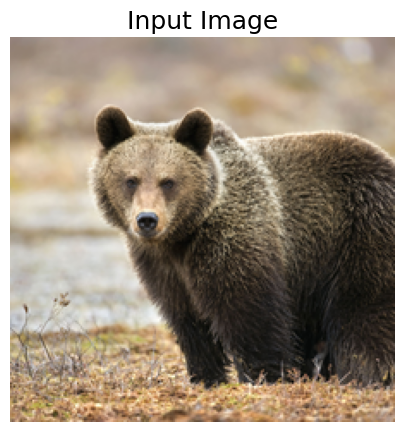

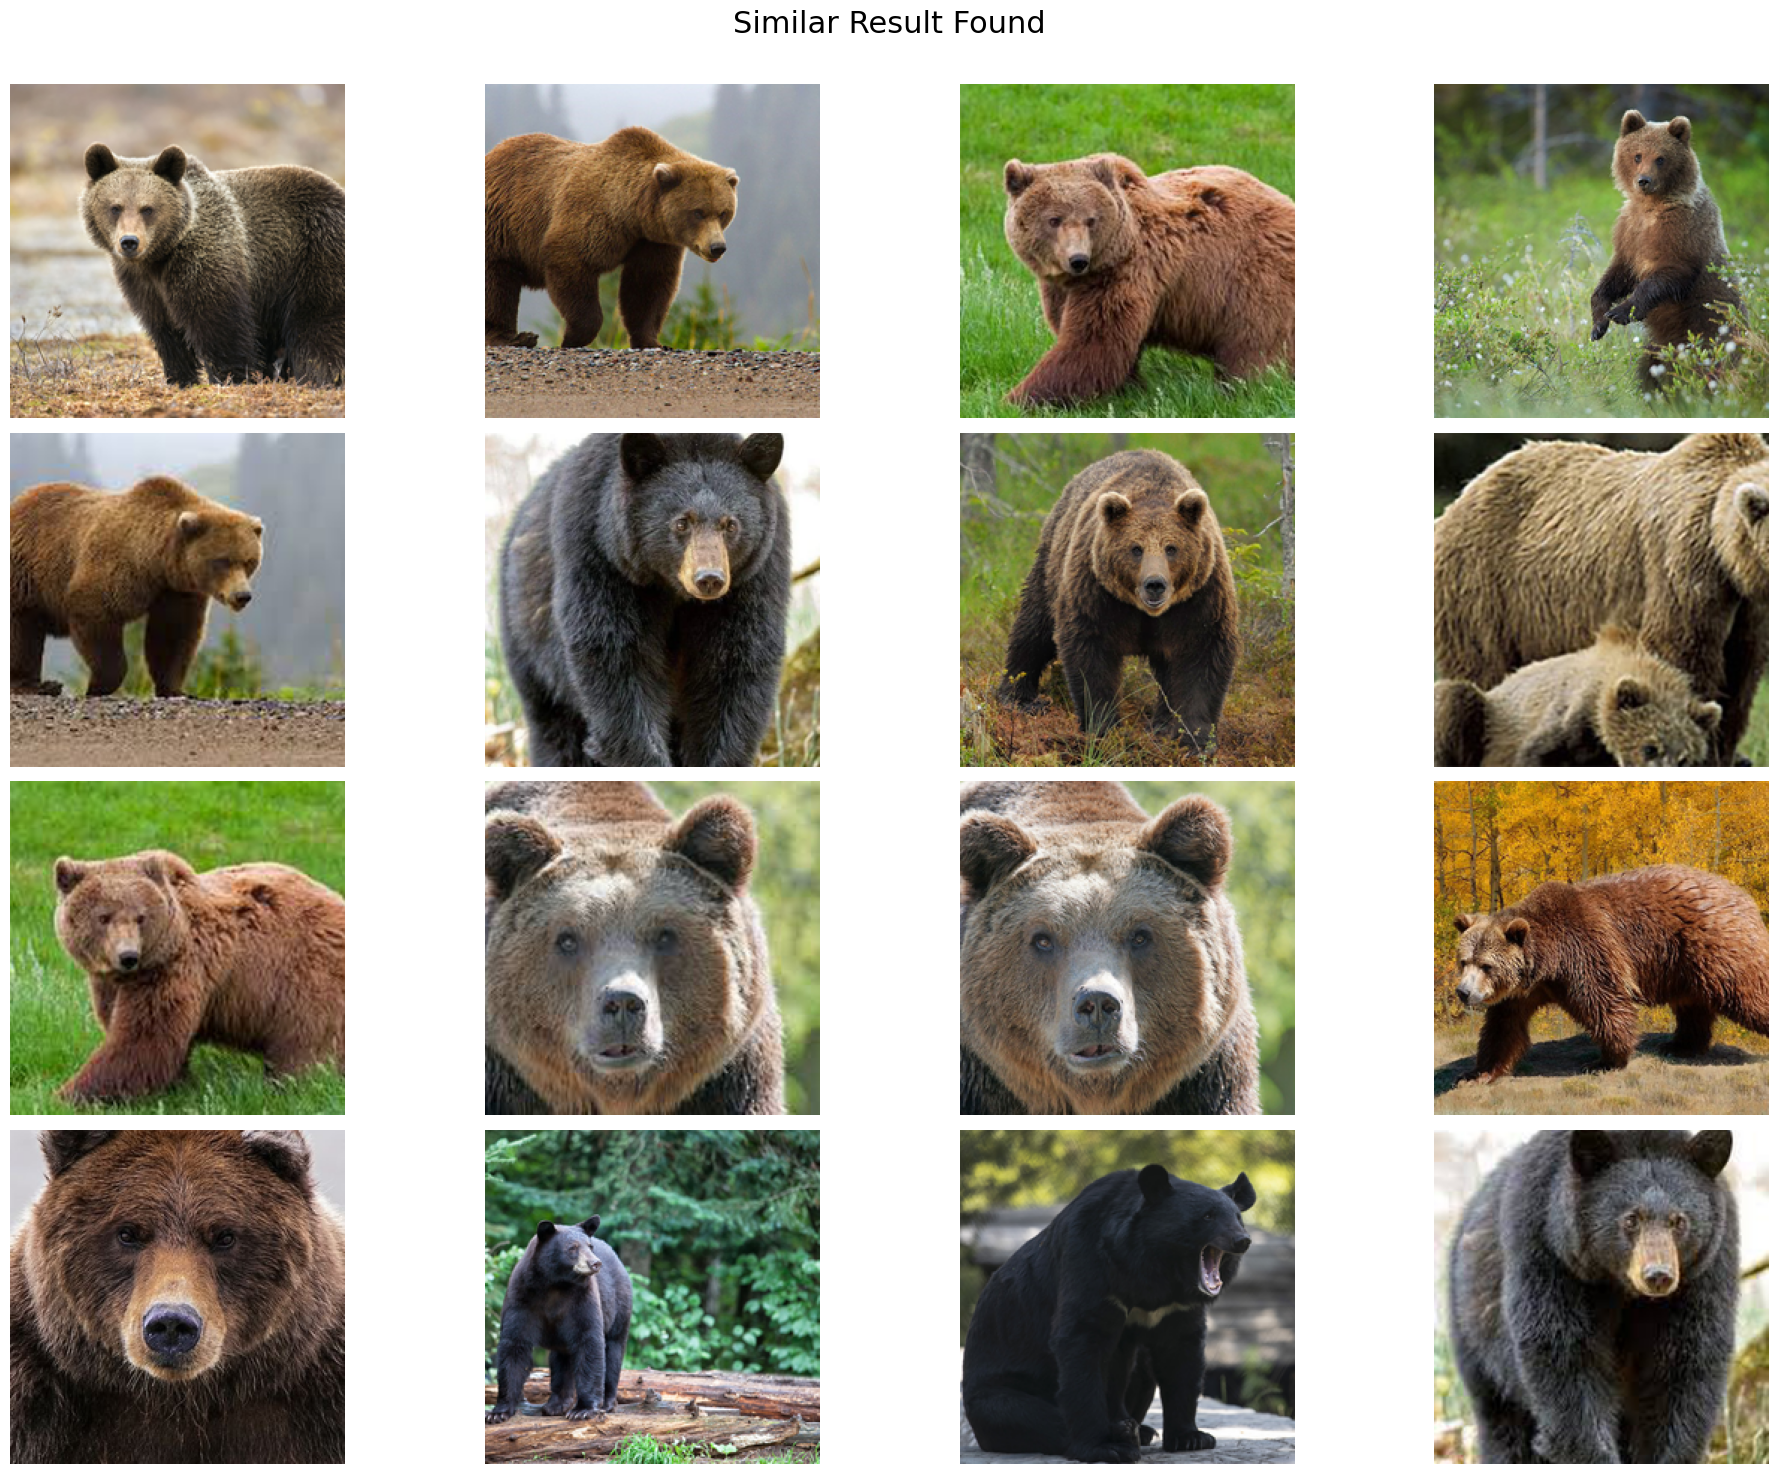

In [28]:
plot_similar_images_new(image_path = image_list[350],number_of_images=16)

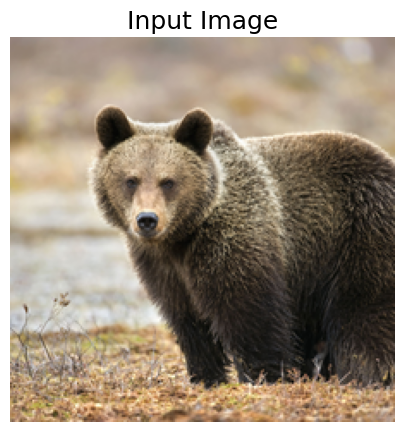

RuntimeError: ignored

In [9]:
# Plot similar images
st.plot_similar_images(image_path = image_list[350],number_of_images=16)